In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/NLP/HW3/

/content/drive/My Drive/NLP/HW3


In [16]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print('GPU is available')
else:
    print('GPU is not available')


GPU is available


In [3]:
import numpy as np
import random

class GibbsSamplingLDA:
    def __init__(self, num_topics, alpha, beta, num_iterations):
        self.num_topics = num_topics
        self.alpha = alpha
        self.beta = beta
        self.num_iterations = num_iterations

    def fit(self, documents, vocab):
        self.vocab = vocab
        self.num_docs = len(documents)
        self.doc_lengths = [len(doc) for doc in documents]

        # Initialize topic assignments randomly
        self.topic_assignments = [[random.randint(0, self.num_topics - 1) for _ in range(len(doc))] for doc in documents]

        # Initialize count matrices
        self.topic_doc_count = np.zeros((self.num_docs, self.num_topics))
        self.word_topic_count = np.zeros((len(self.vocab), self.num_topics))
        self.topic_count = np.zeros(self.num_topics)

        for doc_idx, doc in enumerate(documents):
            for word_idx, word in enumerate(doc):
                topic = self.topic_assignments[doc_idx][word_idx]
                self.topic_doc_count[doc_idx][topic] += 1
                self.word_topic_count[self.vocab.index(word)][topic] += 1
                self.topic_count[topic] += 1

        # Gibbs Sampling iterations
        for _ in range(self.num_iterations):
            for doc_idx, doc in enumerate(documents):
                for word_idx, word in enumerate(doc):
                    # Remove current word from counts
                    word_topic = self.topic_assignments[doc_idx][word_idx]
                    self.topic_doc_count[doc_idx][word_topic] -= 1
                    self.word_topic_count[self.vocab.index(word)][word_topic] -= 1
                    self.topic_count[word_topic] -= 1

                    # Sample a new topic assignment
                    p_topic = self.calculate_topic_distribution(doc_idx, word)
                    new_topic = np.random.choice(range(self.num_topics), p=p_topic)

                    # Update counts with new topic
                    self.topic_assignments[doc_idx][word_idx] = new_topic
                    self.topic_doc_count[doc_idx][new_topic] += 1
                    self.word_topic_count[self.vocab.index(word)][new_topic] += 1
                    self.topic_count[new_topic] += 1

    def calculate_topic_distribution(self, doc_idx, word):
        word_id = self.vocab.index(word)
        p_topic = [(self.word_topic_count[word_id][k] + self.beta) / (self.topic_count[k] + len(self.vocab) * self.beta) *
                   (self.topic_doc_count[doc_idx][k] + self.alpha) / (self.doc_lengths[doc_idx] + self.num_topics * self.alpha)
                   for k in range(self.num_topics)]
        p_topic = np.array(p_topic) / np.sum(p_topic)
        return p_topic

# Example usage
documents = [['history', 'topic', 'modeling', 'gibbs', 'sampling', 'lda'],
             ['method', 'utilize', 'topic', 'modeling', 'technique', 'delve', 'rich', 'historical', 'discussion'],
             ['sentiment', 'analysis', 'vader', 'tool', 'community', 'sentiment', 'align', 'specific', 'historical', 'event']]
vocab = ['history', 'topic', 'modeling', 'gibbs', 'sampling', 'lda', 'method', 'utilize', 'technique', 'delve', 'rich',
         'historical', 'discussion', 'sentiment', 'analysis', 'vader', 'tool', 'community', 'align', 'specific', 'event']

num_topics = 3
alpha = 0.1
beta = 0.01
num_iterations = 100

lda_model = GibbsSamplingLDA(num_topics, alpha, beta, num_iterations)
lda_model.fit(documents, vocab)

# Display topic assignments
for i, doc in enumerate(documents):
    print(f"Document {i+1}:")
    for j, word in enumerate(doc):
        print(f"\t{word} - Topic {lda_model.topic_assignments[i][j]}")


Document 1:
	history - Topic 1
	topic - Topic 1
	modeling - Topic 1
	gibbs - Topic 1
	sampling - Topic 1
	lda - Topic 1
Document 2:
	method - Topic 0
	utilize - Topic 0
	topic - Topic 1
	modeling - Topic 1
	technique - Topic 1
	delve - Topic 0
	rich - Topic 1
	historical - Topic 0
	discussion - Topic 1
Document 3:
	sentiment - Topic 2
	analysis - Topic 0
	vader - Topic 0
	tool - Topic 2
	community - Topic 0
	sentiment - Topic 2
	align - Topic 0
	specific - Topic 0
	historical - Topic 0
	event - Topic 2


In [4]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 44.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [3]:
!pip install transformers
!pip install nltk

In [4]:
from datasets import load_dataset
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load the dataset
dataset = load_dataset("Pavithree/askHistorians", split="train[:1000]")


Repo card metadata block was not found. Setting CardData to empty.


In [5]:
df_data = pd.DataFrame(dataset)

df_data.head()

,q_id,title,selftext,document,subreddit,url,answers,title_urls,selftext_urls,answers_urls
0,1yc9zg,Are there any good source material on the Wars...,"Hi guys, I have a project I'm working on which...",,AskHistorians,http://www.reddit.com/r/AskHistorians/comments...,"{'a_id': ['cfj9u9t'], 'score': [3], 'text': ['...",[],[],[[http://www.worldcat.org/title/warsaw-diary-o...
1,1j7pwx,Following the passing of the Thirteenth Amendm...,I'm curious as to whether there were any remot...,,AskHistorians,http://www.reddit.com/r/AskHistorians/comments...,"{'a_id': ['cbc0e13', 'cbc0gmv', 'cbc2ka2'], 's...",[],[],"[[], [S.D.Ga, http://books.google.com/books/ab..."
2,3qr7uu,"In medieval and pre-modern times, political en...",this peace didn't last*...,,AskHistorians,https://www.reddit.com/r/AskHistorians/comment...,"{'a_id': ['cwi14dl'], 'score': [11], 'text': [...",[],[],[[https://en.wikipedia.org/wiki/Kingdom_of_Cas...
3,fvbxhi,What happened to German and Italian volunteers...,,,AskHistorians,https://www.reddit.com/r/AskHistorians/comment...,"{'a_id': ['fmhopoa'], 'score': [3], 'text': ['...",[],[],[[https://www.reddit.com/r/AskHistorians/comme...
4,31qce9,What (if anything) did Native Americans think ...,Were there any religious or cultural assumptio...,,AskHistorians,http://www.reddit.com/r/AskHistorians/comments...,"{'a_id': ['cq3z8lb'], 'score': [7], 'text': ['...",[],[],[[]]


In [12]:
import glob
import pandas as pd

# Step 1: Get file paths
file_paths = glob.glob('comments/*.parquet')

# Step 2: Read Parquet files into a list
dfs = []
for file in file_paths:
    try:
        df = pd.read_parquet(file)
        dfs.append(df)
        print(f"Successfully read: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Step 3: Check if there are files to concatenate
if len(dfs) > 0:
    # Step 4: Concatenate DataFrames into a single DataFrame
    df_comments = pd.concat(dfs, ignore_index=True)
    print("Concatenation successful.")
else:
    print("No Parquet files found.")


Successfully read: comments/AskHistorians-00000-of-00005-7bc8c6a7ee105086.parquet
Successfully read: comments/AskHistorians-00001-of-00005-a4b2a36ae8eb6dde.parquet
Successfully read: comments/AskHistorians-00004-of-00005-76c3eb5c7cde9f6f.parquet
Successfully read: comments/AskHistorians-00002-of-00005-f37b6800dc969287.parquet
Successfully read: comments/AskHistorians-00003-of-00005-330d2299e0da6dec.parquet
Concatenation successful.


In [7]:
df_comments.head()


,archived,author,author_fullname,body,comment_type,controversiality,created_utc,edited,gilded,id,...,locked,name,parent_id,permalink,retrieved_on,score,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received
0,True,collinpetty,None,IANAH but as I understand it parties formed na...,None,0,1314593142,False,0,c2fy8zp,...,None,t1_c2fy8zp,t3_jxlaw,None,1427532096,5,t5_2ssp3,None,None,None
1,True,boozername,None,yeah this is what I learned too; the structure...,None,0,1314612462,False,0,c2fzl7e,...,None,t1_c2fzl7e,t1_c2fy8zp,None,1427532728,1,t5_2ssp3,None,None,None
2,True,alesserknownceleb,None,My understanding was that the Japanese intende...,None,0,1314636846,True,0,c2g1ior,...,None,t1_c2g1ior,t3_jy24r,None,1427533637,12,t5_2ssp3,None,None,None
3,True,digger_ex_pat,None,Thanks. I had never heard that before.\n\nWhat...,None,0,1314637722,False,0,c2g1mqc,...,None,t1_c2g1mqc,t1_c2g1ior,None,1427533690,1,t5_2ssp3,None,None,None
4,True,DocFreeman,None,I got my BA in the History of Public Policy la...,None,0,1314643810,False,0,c2g2fib,...,None,t1_c2g2fib,t3_jxh0x,None,1427534067,5,t5_2ssp3,None,None,None


In [8]:
print(df_comments.columns)
print(len(df))

Index(['archived', 'author', 'author_fullname', 'body', 'comment_type',
       'controversiality', 'created_utc', 'edited', 'gilded', 'id', 'link_id',
       'locked', 'name', 'parent_id', 'permalink', 'retrieved_on', 'score',
       'subreddit_id', 'subreddit_name_prefixed', 'subreddit_type',
       'total_awards_received'],
      dtype='object')
542870


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
import numpy as np
import random
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

class GibbsSamplingLDA:
    def __init__(self, num_topics, alpha, beta, num_iterations):
        self.num_topics = num_topics
        self.alpha = alpha
        self.beta = beta
        self.num_iterations = num_iterations

    def fit(self, documents, vocab):
        self.vocab = vocab
        self.num_docs = len(documents)
        self.doc_lengths = [len(doc) for doc in documents]

        # Initialize topic assignments randomly
        self.topic_assignments = [[random.randint(0, self.num_topics - 1) for _ in range(len(doc))] for doc in documents]

        # Initialize count matrices
        self.topic_doc_count = np.zeros((self.num_docs, self.num_topics))
        self.word_topic_count = np.zeros((len(self.vocab), self.num_topics))
        self.topic_count = np.zeros(self.num_topics)

        for doc_idx, doc in enumerate(documents):
            for word_idx, word in enumerate(doc):
                topic = self.topic_assignments[doc_idx][word_idx]
                self.topic_doc_count[doc_idx][topic] += 1
                self.word_topic_count[self.vocab.index(word)][topic] += 1
                self.topic_count[topic] += 1

        # Gibbs Sampling iterations
        for _ in range(self.num_iterations):
            for doc_idx, doc in enumerate(documents):
                for word_idx, word in enumerate(doc):
                    # Remove current word from counts
                    word_topic = self.topic_assignments[doc_idx][word_idx]
                    self.topic_doc_count[doc_idx][word_topic] -= 1
                    self.word_topic_count[self.vocab.index(word)][word_topic] -= 1
                    self.topic_count[word_topic] -= 1

                    # Sample a new topic assignment
                    p_topic = self.calculate_topic_distribution(doc_idx, word)
                    new_topic = np.random.choice(range(self.num_topics), p=p_topic)

                    # Update counts with new topic
                    self.topic_assignments[doc_idx][word_idx] = new_topic
                    self.topic_doc_count[doc_idx][new_topic] += 1
                    self.word_topic_count[self.vocab.index(word)][new_topic] += 1
                    self.topic_count[new_topic] += 1

    def calculate_topic_distribution(self, doc_idx, word):
        word_id = self.vocab.index(word)
        p_topic = [(self.word_topic_count[word_id][k] + self.beta) / (self.topic_count[k] + len(self.vocab) * self.beta) *
                   (self.topic_doc_count[doc_idx][k] + self.alpha) / (self.doc_lengths[doc_idx] + self.num_topics * self.alpha)
                   for k in range(self.num_topics)]
        p_topic = np.array(p_topic) / np.sum(p_topic)
        return p_topic

# Load dataset
data = df_comments[:100]

# Preprocess text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

documents = [preprocess_text(text) for text in data['body']]
vocab = list(set([word for doc in documents for word in doc]))

# Parameters
num_topics = 10
alpha = 0.1
beta = 0.01
num_iterations = 100

# Instantiate and fit LDA model
lda_model = GibbsSamplingLDA(num_topics, alpha, beta, num_iterations)
lda_model.fit(documents, vocab)

# Display topic assignments for a sample document
# sample_doc_idx = 0
# print("Sample Document Topics:")
# for i, word in enumerate(documents[sample_doc_idx]):
#     print(f"\t{word} - Topic {lda_model.topic_assignments[sample_doc_idx][i]}")

num_words=10# top 10 words
for topic_idx in range(lda_model.num_topics):
        top_words = [lda_model.vocab[word_id] for word_id in np.argsort(lda_model.word_topic_count[:, topic_idx])[::-1][:num_words]]
        print(f"Topic {topic_idx + 1}:")
        print(top_words)


Topic 1:
['government', 'society', 'age', 'dark', 'would', 'civilization', 'time', 'humanity', 'culture', 'new']
Topic 2:
['roman', 'think', 'question', 'caligula', 'point', 'power', 'quite', 'still', 'case', 'either']
Topic 3:
['state', 'could', 'http', 'course', 'virginia', 'chinese', 'colony', 'company', 'would', 'modern']
Topic 4:
['one', 'think', 'year', 'human', 'lot', 'past', 'could', 'evidence', 'first', 'well']
Topic 5:
['would', 'ancient', 'like', 'made', 'prior', 'ago', 'period', 'might', 'understanding', 'deified']
Topic 6:
['history', 'also', 'war', 'japanese', 'phd', 'u', 'area', 'great', 'research', 'go']
Topic 7:
['world', 'make', 'many', 'little', 'set', 'one', 'thing', 'good', 'reason', 'sure']
Topic 8:
['people', 'way', 'today', 'america', 'hard', 'rich', 'interested', 'work', 'relic', 'get']
Topic 9:
['object', 'museum', 'may', 'political', 'party', 'collection', 'private', 'became', 'stuff', 'religious']
Topic 10:
['history', 'american', 'time', 'know', 'public', '

In [15]:
top_words_per_topic = []
for topic_idx in range(lda_model.num_topics):
    top_words = [lda_model.vocab[word_id] for word_id in np.argsort(lda_model.word_topic_count[:, topic_idx])[::-1][:num_words]]
    top_words_per_topic.append(top_words)

# Compute co-occurrence statistics
co_occurrence_counts = {}
for doc in documents:
    for word in doc:
        if word not in co_occurrence_counts:
            co_occurrence_counts[word] = {}
        for other_word in doc:
            if other_word != word:
                co_occurrence_counts[word][other_word] = co_occurrence_counts[word].get(other_word, 0) + 1

# Calculate coherence scores
def cv_coherence(top_words_per_topic, co_occurrence_counts):
    coherence_scores = []
    for topic_words in top_words_per_topic:
        coherence_score = 0
        for i, word1 in enumerate(topic_words):
            if word1 in co_occurrence_counts:
                for j, word2 in enumerate(topic_words):
                    if i != j:
                        co_occurrences = co_occurrence_counts[word1].get(word2, 0)
                        coherence_score += np.log((co_occurrences + 1) / co_occurrence_counts[word1].get(word1, 1))
        coherence_score /= len(topic_words) * (len(topic_words) - 1)
        coherence_scores.append(coherence_score)
    return np.mean(coherence_scores)

def umass_coherence(top_words_per_topic, co_occurrence_counts):
    coherence_scores = []
    for topic_words in top_words_per_topic:
        coherence_score = 0
        for i, word1 in enumerate(topic_words):
            if word1 in co_occurrence_counts:
                for j, word2 in enumerate(topic_words):
                    if i != j:
                        co_occurrences = co_occurrence_counts[word1].get(word2, 0)
                        coherence_score += np.log((co_occurrences + 1) / sum(co_occurrence_counts[word1].values()))
        coherence_score /= len(topic_words) * (len(topic_words) - 1)
        coherence_scores.append(coherence_score)
    return np.mean(coherence_scores)


# Calculate coherence scores
cv_coherence_score = cv_coherence(top_words_per_topic, co_occurrence_counts)
umass_coherence_score = umass_coherence(top_words_per_topic, co_occurrence_counts)

print("C_V Coherence Score:", cv_coherence_score)
print("UMass Coherence Score:", umass_coherence_score)

C_V Coherence Score: 1.8224215631390517
UMass Coherence Score: -5.322699627697598


In [4]:
import glob
import pandas as pd
import numpy as np
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
import time

class GibbsSamplingLDA:
    def __init__(self, num_topics, alpha, beta, num_iterations):
        self.num_topics = num_topics
        self.alpha = alpha
        self.beta = beta
        self.num_iterations = num_iterations

    def fit(self, documents, vocab):
        self.vocab = vocab
        self.num_docs = len(documents)
        self.doc_lengths = [len(doc) for doc in documents]

        # Initialize count matrices
        self.topic_doc_count = np.zeros((self.num_docs, self.num_topics))
        self.word_topic_count = np.zeros((len(self.vocab), self.num_topics))
        self.topic_count = np.zeros(self.num_topics)

        # Initialize topic assignments randomly
        self.topic_assignments = [[random.randint(0, self.num_topics - 1) for _ in range(len(doc))] for doc in documents]

        # Precompute some values for efficiency
        word_indices = {word: idx for idx, word in enumerate(vocab)}
        num_vocab = len(vocab)

        for doc_idx, doc in enumerate(documents):
            for word_idx, word in enumerate(doc):
                topic = self.topic_assignments[doc_idx][word_idx]
                word_id = word_indices[word]

                self.topic_doc_count[doc_idx][topic] += 1
                self.word_topic_count[word_id][topic] += 1
                self.topic_count[topic] += 1

        # Gibbs Sampling iterations
        for iteration in range(self.num_iterations):
            start_time = time.time()

            for doc_idx, doc in enumerate(documents):
                for word_idx, word in enumerate(doc):
                    self.update_topic_assignment(doc_idx, word_idx, word, word_indices, num_vocab)

            elapsed_time = time.time() - start_time
            print(f"Iteration {iteration + 1}/{self.num_iterations} completed in {elapsed_time:.2f} seconds.")

    def update_topic_assignment(self, doc_idx, word_idx, word, word_indices, num_vocab):
        # Remove current word from counts
        word_topic = self.topic_assignments[doc_idx][word_idx]
        self.topic_doc_count[doc_idx][word_topic] -= 1
        self.word_topic_count[word_indices[word]][word_topic] -= 1
        self.topic_count[word_topic] -= 1

        # Sample a new topic assignment
        p_topic = self.calculate_topic_distribution(doc_idx, word, word_indices, num_vocab)
        new_topic = np.random.choice(self.num_topics, p=p_topic)

        # Update counts with new topic
        self.topic_assignments[doc_idx][word_idx] = new_topic
        self.topic_doc_count[doc_idx][new_topic] += 1
        self.word_topic_count[word_indices[word]][new_topic] += 1
        self.topic_count[new_topic] += 1

    def calculate_topic_distribution(self, doc_idx, word, word_indices, num_vocab):
        word_id = word_indices[word]
        p_topic = (self.word_topic_count[word_id] + self.beta) / (self.topic_count + num_vocab * self.beta) * \
                  (self.topic_doc_count[doc_idx] + self.alpha) / (self.doc_lengths[doc_idx] + self.num_topics * self.alpha)
        p_topic /= np.sum(p_topic)
        return p_topic

# Calculate coherence scores
def cv_coherence(top_words_per_topic, co_occurrence_counts):
    coherence_scores = []
    for topic_words in top_words_per_topic:
        coherence_score = 0
        for i, word1 in enumerate(topic_words):
            if word1 in co_occurrence_counts:
                for j, word2 in enumerate(topic_words):
                    if i != j:
                        co_occurrences = co_occurrence_counts[word1].get(word2, 0)
                        coherence_score += np.log((co_occurrences + 1) / co_occurrence_counts[word1].get(word1, 1))
        coherence_score /= len(topic_words) * (len(topic_words) - 1)
        coherence_scores.append(coherence_score)
    return np.mean(coherence_scores)

def umass_coherence(top_words_per_topic, co_occurrence_counts):
    coherence_scores = []
    for topic_words in top_words_per_topic:
        coherence_score = 0
        for i, word1 in enumerate(topic_words):
            if word1 in co_occurrence_counts:
                for j, word2 in enumerate(topic_words):
                    if i != j:
                        co_occurrences = co_occurrence_counts[word1].get(word2, 0)
                        denominator = sum(co_occurrence_counts[word1].values())
                        if denominator != 0:
                            coherence_score += np.log((co_occurrences + 1) / denominator)
        if len(topic_words) > 1:
            coherence_score /= len(topic_words) * (len(topic_words) - 1)
        coherence_scores.append(coherence_score)
    return np.mean(coherence_scores)

# Step 1: Get file paths
file_paths = glob.glob('comments/*.parquet')

# Step 2: Read Parquet files into a list
dfs = []
for file in file_paths:
    try:
        df = pd.read_parquet(file)
        dfs.append(df)
        print(f"Successfully read: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Step 3: Check if there are files to concatenate
if len(dfs) > 0:
    # Step 4: Concatenate DataFrames into a single DataFrame
    df_comments = pd.concat(dfs, ignore_index=True)
    print("Concatenation successful.")
else:
    print("No Parquet files found.")



Successfully read: comments/AskHistorians-00000-of-00005-7bc8c6a7ee105086.parquet
Successfully read: comments/AskHistorians-00001-of-00005-a4b2a36ae8eb6dde.parquet
Successfully read: comments/AskHistorians-00004-of-00005-76c3eb5c7cde9f6f.parquet
Successfully read: comments/AskHistorians-00002-of-00005-f37b6800dc969287.parquet
Successfully read: comments/AskHistorians-00003-of-00005-330d2299e0da6dec.parquet
Concatenation successful.


In [5]:
# Load dataset
data = df_comments[:10000]

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Preprocess text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

documents = [preprocess_text(text) for text in data['body']]
vocab = list(set([word for doc in documents for word in doc]))

# Parameters
num_topics = 10
alpha = 0.1
beta = 0.01
num_iterations = 10  # Reduce the number of iterations

# Instantiate and fit LDA model
lda_model = GibbsSamplingLDA(num_topics, alpha, beta, num_iterations)
lda_model.fit(documents, vocab)


num_words=10# top 10 words
for topic_idx in range(lda_model.num_topics):
        top_words = [lda_model.vocab[word_id] for word_id in np.argsort(lda_model.word_topic_count[:, topic_idx])[::-1][:num_words]]
        print(f"Topic {topic_idx + 1}:")
        print(top_words)


top_words_per_topic = []
for topic_idx in range(lda_model.num_topics):
    top_words = [lda_model.vocab[word_id] for word_id in np.argsort(lda_model.word_topic_count[:, topic_idx])[::-1][:num_words]]
    top_words_per_topic.append(top_words)

# Compute co-occurrence statistics
co_occurrence_counts = {}
for doc in documents:
    for word in doc:
        if word not in co_occurrence_counts:
            co_occurrence_counts[word] = {}
        for other_word in doc:
            if other_word != word:
                co_occurrence_counts[word][other_word] = co_occurrence_counts[word].get(other_word, 0) + 1

# Calculate coherence scores
cv_coherence_score = cv_coherence(top_words_per_topic, co_occurrence_counts)
umass_coherence_score = umass_coherence(top_words_per_topic, co_occurrence_counts)

print("C_V Coherence Score:", cv_coherence_score)
print("UMass Coherence Score:", umass_coherence_score)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Iteration 1/10 completed in 27.58 seconds.
Iteration 2/10 completed in 27.13 seconds.
Iteration 3/10 completed in 33.65 seconds.
Iteration 4/10 completed in 35.92 seconds.
Iteration 5/10 completed in 27.19 seconds.
Iteration 6/10 completed in 28.50 seconds.
Iteration 7/10 completed in 26.66 seconds.
Iteration 8/10 completed in 26.59 seconds.
Iteration 9/10 completed in 26.90 seconds.
Iteration 10/10 completed in 26.07 seconds.
Topic 1:
['history', 'would', 'year', 'like', 'good', 'really', 'think', 'get', 'u', 'people']
Topic 2:
['war', 'would', 'could', 'people', 'time', 'even', 'one', 'u', 'american', 'german']
Topic 3:
['history', 'roman', 'like', 'many', 'http', 'think', 'one', 'people', 'would', 'say']
Topic 4:
['history', 'would', 'really', 'much', 'question', 'people', 'one', 'think', 'good', 'know']
Topic 5:
['time', 'one', 'people', 'history', 'book', 'know', 'like', 'http', 'gt', 'would']
Topic 6:
['war', 'state', 'would', 'army', 'one', 'empire', 'first', 'time', 'year', 'go

In [29]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download the VADER lexicon (do this once)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Ensure the 'body' column exists in your DataFrame
if 'df_comments' in locals() and 'body' in df_comments.columns:
    # Calculate the number of rows for the first 10%
    rows_to_analyze = int(len(df_comments) * 0.01)

    # Select the first 10% of the data
    df_subset = df_comments.head(rows_to_analyze)

    # Perform sentiment analysis on the 'body' column of the subset
    df_subset['sentiment_scores'] = df_subset['body'].apply(lambda x: sid.polarity_scores(x))

    # Extract compound sentiment scores from the result
    df_subset['compound_score'] = df_subset['sentiment_scores'].apply(lambda x: x['compound'])

    # Categorize sentiment based on a threshold (adjust as needed)
    threshold = 0.1
    df_subset['sentiment_category'] = pd.cut(df_subset['compound_score'], bins=[-float('inf'), -threshold, threshold, float('inf')],
                                             labels=['negative', 'neutral', 'positive'])

    # Print the head of the subset DataFrame with sentiment information
    print("Head of the Subset DataFrame with Sentiment Information:")
    print(df_subset[['body', 'compound_score', 'sentiment_category']])
else:
    print("No DataFrame or 'body' column to perform sentiment analysis.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Head of the Subset DataFrame with Sentiment Information:
                                                    body  compound_score  \
0      This is an extremely broad overview and leaves...          0.8178   
1                                              [deleted]          0.0000   
2                                    Makes sense! Thanks          0.4926   
3                                              [deleted]          0.0000   
4      Republic named the years after the two yearly ...          0.4939   
...                                                  ...             ...   
27138  It did affect it significantly, but I imagine ...          0.0000   
27139  September 1980, in a Titan II ICBM silo near D...         -0.9611   
27140                                          [deleted]          0.0000   
27141  One of the greatest hopes of the period was th...          0.9591   
27142  Thank you for your answer. Always found it a b...          0.2023   

      sentiment_category  
0  

<ipython-input-29-ffcdd8b7f9a2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['sentiment_scores'] = df_subset['body'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-29-ffcdd8b7f9a2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['compound_score'] = df_subset['sentiment_scores'].apply(lambda x: x['compound'])
<ipython-input-29-ffcdd8b7f9a2>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [30]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download the VADER lexicon (do this once)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Ensure the 'body' column exists in your DataFrame
if 'df_comments' in locals() and 'body' in df_comments.columns:
    # Calculate the number of rows for the first 10%
    rows_to_analyze = int(len(df_comments) * 0.01)

    # Select the first 10% of the data
    df_subset = df_comments.head(rows_to_analyze)

    # Perform sentiment analysis on the 'body' column of the subset
    df_subset['sentiment_scores'] = df_subset['body'].apply(lambda x: sid.polarity_scores(x))

    # Extract compound sentiment scores from the result
    df_subset['compound_score'] = df_subset['sentiment_scores'].apply(lambda x: x['compound'])

    # Define emotion categories based on compound scores
    emotion_mapping = {
        'very_negative': (-1, -0.5),
        'negative': (-0.5, 0),
        'neutral': (0, 0.5),
        'positive': (0.5, 1),
        'very_positive': (1, float('inf'))
        # Add more fine-grained emotion categories and score ranges as needed
    }

    # Function to categorize sentiment based on compound score
    def categorize_emotion(compound_score):
        for emotion, (lower_bound, upper_bound) in emotion_mapping.items():
            if lower_bound <= compound_score < upper_bound:
                return emotion
        return 'other'  # If none of the specified emotions are matched, categorize as 'other'

    # Apply emotion categorization based on compound scores
    df_subset['emotion_category'] = df_subset['compound_score'].apply(categorize_emotion)

    # Print the head of the subset DataFrame with emotion information
    print("Head of the Subset DataFrame with Emotion Information:")
    print(df_subset[['body', 'compound_score', 'emotion_category']])
else:
    print("No DataFrame or 'body' column to perform sentiment analysis.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Head of the Subset DataFrame with Emotion Information:
                                                    body  compound_score  \
0      This is an extremely broad overview and leaves...          0.8178   
1                                              [deleted]          0.0000   
2                                    Makes sense! Thanks          0.4926   
3                                              [deleted]          0.0000   
4      Republic named the years after the two yearly ...          0.4939   
...                                                  ...             ...   
27138  It did affect it significantly, but I imagine ...          0.0000   
27139  September 1980, in a Titan II ICBM silo near D...         -0.9611   
27140                                          [deleted]          0.0000   
27141  One of the greatest hopes of the period was th...          0.9591   
27142  Thank you for your answer. Always found it a b...          0.2023   

      emotion_category  
0      

<ipython-input-30-3876a2433198>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['sentiment_scores'] = df_subset['body'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-30-3876a2433198>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['compound_score'] = df_subset['sentiment_scores'].apply(lambda x: x['compound'])
<ipython-input-30-3876a2433198>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [31]:
df_subset.head()

,archived,author,author_fullname,body,comment_type,controversiality,created_utc,edited,gilded,id,...,permalink,retrieved_on,score,subreddit_id,subreddit_name_prefixed,subreddit_type,total_awards_received,sentiment_scores,compound_score,emotion_category
0,True,whatsasnozberry,None,This is an extremely broad overview and leaves...,None,0,1382258683,1382260938,0,ccviptb,...,None,1429066133,18,t5_2ssp3,None,None,None,"{'neg': 0.04, 'neu': 0.89, 'pos': 0.07, 'compo...",0.8178,positive
1,True,[deleted],None,[deleted],None,0,1382258706,False,0,ccvipxv,...,None,1429066131,0,t5_2ssp3,None,None,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,True,TheVegetaMonologues,None,Makes sense! Thanks,None,0,1382258737,False,0,ccviq3e,...,None,1429066129,2,t5_2ssp3,None,None,None,"{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...",0.4926,neutral
3,True,[deleted],None,[deleted],None,0,1382258792,False,0,ccviqe8,...,None,1429066125,0,t5_2ssp3,None,None,None,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,True,idio3,None,Republic named the years after the two yearly ...,None,0,1382258797,False,0,ccviqf2,...,None,1429066125,12,t5_2ssp3,None,None,None,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.4939,neutral


In [32]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Download the VADER lexicon (do this once)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Ensure the 'body' column exists in your DataFrame
if 'df_comments' in locals() and 'body' in df_comments.columns:
    # Calculate the number of rows for the first 10%
    rows_to_analyze = int(len(df_comments) * 0.01)

    # Select the first 10% of the data
    df_subset = df_comments.head(rows_to_analyze)

    # Perform sentiment analysis on the 'body' column of the subset
    df_subset['sentiment_scores'] = df_subset['body'].apply(lambda x: sid.polarity_scores(x))

    # Extract compound sentiment scores from the result
    df_subset['compound_score'] = df_subset['sentiment_scores'].apply(lambda x: x['compound'])

    # Define emotion categories based on compound scores
    emotion_mapping = {
        'very_negative': (-1, -0.6),
        'negative': (-0.6, -0.3),
        'sad': (-0.3, 0),
        'neutral': (0, 0.3),
        'happy': (0.3, 0.6),
        'joyful': (0.6, 1),
        'very_positive': (1, float('inf')),
        'angry': (-float('inf'), -0.8),
        'fearful': (-0.8, -0.6),
        'surprised': (0.6, 0.8),
        'disgusted': (0.8, float('inf'))
        # Add more fine-grained emotion categories and score ranges as needed
    }

    # Function to categorize sentiment based on compound score
    def categorize_emotion(compound_score):
        for emotion, (lower_bound, upper_bound) in emotion_mapping.items():
            if lower_bound <= compound_score < upper_bound:
                return emotion
        return 'other'  # If none of the specified emotions are matched, categorize as 'other'

    # Apply emotion categorization based on compound scores
    df_subset['emotion_category'] = df_subset['compound_score'].apply(categorize_emotion)

    # Print the head of the subset DataFrame with emotion information
    print("Head of the Subset DataFrame with Emotion Information:")
    print(df_subset[['body', 'compound_score', 'emotion_category']])
else:
    print("No DataFrame or 'body' column to perform sentiment analysis.")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Head of the Subset DataFrame with Emotion Information:
                                                    body  compound_score  \
0      This is an extremely broad overview and leaves...          0.8178   
1                                              [deleted]          0.0000   
2                                    Makes sense! Thanks          0.4926   
3                                              [deleted]          0.0000   
4      Republic named the years after the two yearly ...          0.4939   
...                                                  ...             ...   
27138  It did affect it significantly, but I imagine ...          0.0000   
27139  September 1980, in a Titan II ICBM silo near D...         -0.9611   
27140                                          [deleted]          0.0000   
27141  One of the greatest hopes of the period was th...          0.9591   
27142  Thank you for your answer. Always found it a b...          0.2023   

      emotion_category  
0      

<ipython-input-32-3dd1bbebaf24>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['sentiment_scores'] = df_subset['body'].apply(lambda x: sid.polarity_scores(x))
<ipython-input-32-3dd1bbebaf24>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['compound_score'] = df_subset['sentiment_scores'].apply(lambda x: x['compound'])
<ipython-input-32-3dd1bbebaf24>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

<ipython-input-33-597464ad2e20>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion_category', data=df_subset, palette='muted')


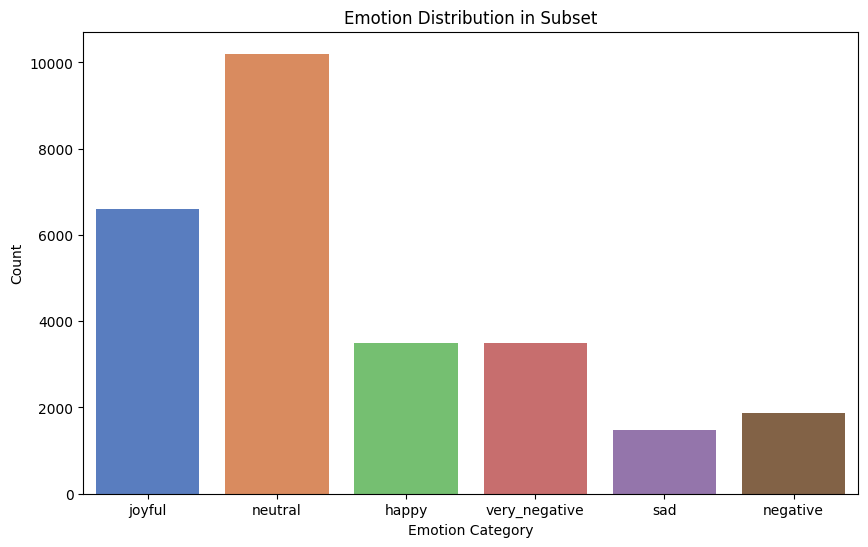

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the 'emotion_category' column exists
if 'df_subset' in locals() and 'emotion_category' in df_subset.columns:
    # Create a bar plot of emotion distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='emotion_category', data=df_subset, palette='muted')
    plt.title('Emotion Distribution in Subset')
    plt.xlabel('Emotion Category')
    plt.ylabel('Count')
    plt.show()
else:
    print("No DataFrame or 'emotion_category' column to visualize.")


In [6]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 15.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [7]:
!pip install sentence_transformers

In [8]:
!pip install umap-learn
!pip install hdbscan

In [22]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, PartOfSpeech, MaximalMarginalRelevance
from bertopic import BERTopic
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load dataset
data = df_comments[:100]  # Assuming you want to use the first 100 comments

# Preprocess text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

data['processed_text'] = data['body'].apply(preprocess_text)

# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(data['processed_text'].tolist(), show_progress_bar=True)

# UMAP model to reduce dimensionality
umap_model = UMAP(n_neighbors=5, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

# Fit UMAP model
umap_embeddings = umap_model.fit_transform(embeddings)

# HDBSCAN model for clustering
hdbscan_model = HDBSCAN(min_cluster_size=5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Fit HDBSCAN model
hdbscan_labels = hdbscan_model.fit_predict(umap_embeddings)

# Create BERTopic model
# topic_model = BERTopic(embedding_model="custom")

# Define representation models
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))
keybert_model = KeyBERTInspired()
pos_model = PartOfSpeech("en_core_web_sm")
mmr_model = MaximalMarginalRelevance(diversity=0.3)

representation_model = {
    "KeyBERT": keybert_model,
    # "OpenAI": openai_model,  # Uncomment if you will use OpenAI
    "MMR": mmr_model,
    "POS": pos_model
}

# Fit BERTopic model
# Fit BERTopic model
# topics, _ = topic_model.fit_transform(data['processed_text'], umap_model=umap_model, hdbscan_model=hdbscan_model, representation_model=keybert_model)


topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True
)

topics, probs = topic_model.fit_transform(data['processed_text'], embeddings)

# Get topic keywords and labels
# keywords = topic_model.get_topic_info()
# labels = topic_model.get_topic(topic_model.get_topic_freq().Topic.tolist())

# # Visualize topics
# topic_model.visualize_topics()


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2024-05-06 02:39:48,549 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-06 02:39:49,813 - BERTopic - Dimensionality - Completed ✓
2024-05-06 02:39:49,818 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-06 02:39:49,829 - BERTopic - Cluster - Completed ✓
2024-05-06 02:39:49,834 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-06 02:39:50,382 - BERTopic - Representation - Completed ✓


In [30]:
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora

documents = pd.DataFrame({"Document": data['processed_text'], "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = [preprocess_text(doc) for doc in documents_per_topic.Document.values]

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model_cv = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence_cv = coherence_model_cv.get_coherence()
print("C_V Coherence Score:", coherence_cv)
# Evaluate
coherence_model_umass = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='u_mass')
coherence_umass = coherence_model_umass.get_coherence()
print("UMass Coherence Score:", coherence_umass)

C_V Coherence Score: 0.5265067108644436
UMass Coherence Score: -0.10535606099729256


In [23]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,KeyBERT,MMR,POS,Representative_Docs
0,0,79,0_people_think_time_year,"[people, think, time, year, like, http, world,...","[historian, modern, century, research, feudal,...","[people, think, time, year, like, http, world,...","[people, time, year, http, world, american, wa...",[modern idea genocide really exist 1700 1800 g...
1,1,15,1_amp_wo_username_love,"[amp, wo, username, love, hobsbawm, hit, check...","[thanks, tag, hobsbawm, check, hit, username, ...","[amp, wo, username, love, hobsbawm, hit, check...","[username, love, thanks, tag, reason, , , , , ]","[sorry hit flair think visible, reason tag wo ..."
2,2,6,2_virginia_america_colonization_english,"[virginia, america, colonization, english, col...","[colonization, colony, colonized, aristocracy,...","[virginia, america, colonization, english, col...","[colonization, english, colony, european, mean...",[money english explorer incentivized colonize ...


In [24]:
topic_model.get_topic(1, full=True)

{'Main': [('amp', 0.5644633883687753),
  ('wo', 0.35978232874383065),
  ('username', 0.35978232874383065),
  ('love', 0.35978232874383065),
  ('hobsbawm', 0.35978232874383065),
  ('hit', 0.35978232874383065),
  ('check', 0.35978232874383065),
  ('sorry', 0.3310520705878311),
  ('worked', 0.31073413831137864),
  ('thanks', 0.2950253571246524)],
 'KeyBERT': [('thanks', 0.5325069),
  ('tag', 0.51049054),
  ('hobsbawm', 0.50468624),
  ('check', 0.46652314),
  ('hit', 0.46594906),
  ('username', 0.4201576),
  ('wo', 0.41948485),
  ('reason', 0.40927988),
  ('love', 0.39197773),
  ('think', 0.38979897)],
 'MMR': [('amp', 0.5644633883687753),
  ('wo', 0.35978232874383065),
  ('username', 0.35978232874383065),
  ('love', 0.35978232874383065),
  ('hobsbawm', 0.35978232874383065),
  ('hit', 0.35978232874383065),
  ('check', 0.35978232874383065),
  ('sorry', 0.3310520705878311),
  ('worked', 0.31073413831137864),
  ('thanks', 0.2950253571246524)],
 'POS': [('username', 0.35978232874383065),
  ('l

In [27]:
topic_model.visualize_hierarchy(custom_labels=True)

In [31]:
topic_model.visualize_barchart()

In [32]:
topic_model.visualize_term_rank()

In [10]:
import pandas as pd
import pickle
import umap
import hdbscan
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from ast import literal_eval

# Read pre-processed data
filtered_df = pd.read_csv('tm_pre_processed_3.csv')
filtered_df = filtered_df[filtered_df['pre_processed'].apply(lambda x: type(x) != float)]
filtered_df['pre_processed'] = filtered_df['pre_processed'].apply(literal_eval)

# Initialize and encode embeddings
model = SentenceTransformer('BAAI/bge-small-en')
embeddings = model.encode(filtered_df.concatenated_text.to_numpy(), show_progress_bar=True)

# UMAP to reduce dimensionality
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine').fit_transform(embeddings)

# HDBSCAN for clustering
cluster = hdbscan.HDBSCAN(min_cluster_size=100, metric='euclidean', cluster_selection_method='eom').fit(umap_embeddings)

# Create DataFrame
docs_df = pd.DataFrame(filtered_df.concatenated_text.to_numpy(), columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index=False).agg({'Doc': ' '.join})

# Functions for coherence calculation
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                              .Doc
                              .count()
                              .reset_index()
                              .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                              .sort_values("Size", ascending=False))
    return topic_sizes

# Calculate TF-IDF and extract top words per topic
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(filtered_df))
top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df)
print(topic_sizes)

# Save DataFrame to CSV
csv_file_path = 'docs_per_topic.csv'
docs_per_topic.to_csv(csv_file_path, index=True)
print(docs_per_topic)

<ipython-input-10-b42a604e0c0c>:12: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_df = pd.read_csv('tm_pre_processed_3.csv')


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/90.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/5801 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from gensim.models import CoherenceModel

coherence_model_cv = CoherenceModel(topics=top_n_words.values(), texts=docs_per_topic.Doc.values, dictionary=count.get_feature_names_out(), coherence='c_v')
coherence_cv = coherence_model_cv.get_coherence()

coherence_model_umass = CoherenceModel(topics=top_n_words.values(), corpus=tf_idf, dictionary=count.get_feature_names_out(), coherence='u_mass')
coherence_umass = coherence_model_umass.get_coherence()

print("C_V Coherence Score:", coherence_cv)
print("UMass Coherence Score:", coherence_umass)